# 1. Importation des packages

In [ ]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn. svm import SVR


from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# 2. Chargement des données

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Analyse de données

In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 4. Prétraitement des données

In [6]:
list_object = ['sex',
               'smoker',
               'region']

In [7]:
label_encoder = LabelEncoder()
for type in list_object:
    data[type] = label_encoder.fit_transform(data[type])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
data.corr().charges.sort_values(ascending =False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

<Axes: >

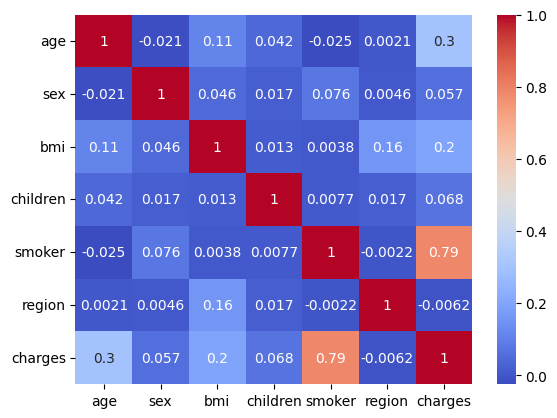

In [11]:
sns.heatmap(data.corr(), annot =True, cmap='coolwarm')

# 5. Division des données : Train et Test 

In [12]:
X = data.iloc [:, :-1]
y = data.iloc[:, -1]

In [13]:
print(f"X_shape: {X.shape}")
print(f"y_shape: {y.shape}")

X_shape: (1338, 6)
y_shape: (1338,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=8)

In [15]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (936, 6)
y_train: (936,)
X_test: (402, 6)
y_test: (402,)


# 6. Construction du ShallowNeural Network et 5 Algorithmes classiques de Machine Learning 

In [16]:
model_list = [RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    max_features='sqrt',  # <- CORRIGÉ
    random_state=42
),
              DecisionTreeRegressor(),
              SVR(),
              LinearRegression(),
              KNeighborsRegressor()
             ]

# 7. Evaluation des modèles

In [17]:
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model}\n")
    print("Mean_squared_error =", mean_squared_error(y_test, y_pred))
    print(f"R2-score =, {r2_score(y_test, y_pred)}\n")

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      random_state=42)

Mean_squared_error = 19109882.457264975
R2-score =, 0.8633004170354944

DecisionTreeRegressor()

Mean_squared_error = 38237137.49231611
R2-score =, 0.7264765620277831

SVR()

Mean_squared_error = 151603592.3605204
R2-score =, -0.08447280604415086

LinearRegression()

Mean_squared_error = 33981766.40920341
R2-score =, 0.7569166996749708

KNeighborsRegressor()

Mean_squared_error = 124265780.2322615
R2-score =, 0.11108399685362302



# 8. Simple prédiction

In [18]:
model_random = RandomForestRegressor()
model_random.fit(X_train, y_train)
y_pred2 = model_random.predict(X_test)

In [19]:
example_index = np.random.randint(0, len(X_test))
example_data = X_test.iloc[example_index].values.reshape(1, -1)

In [20]:
predicted_class = model_random.predict(example_data)

In [21]:
print(f'Example data: {example_data}')
print(f'predicted_class: {predicted_class}')

Example data: [[61.    0.   31.16  0.    0.    1.  ]]
predicted_class: [13337.4188061]
